In [1]:
from tkinter import * 
import tkinter as tk
from PIL import Image, ImageGrab, ImageOps
import numpy as np
from matplotlib import pyplot
import joblib 

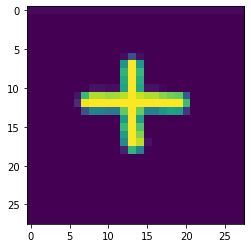

In [3]:
MODAL_NAME  = 'operators_svm_model.gz'
classifier = joblib.load(MODAL_NAME)

class GUI(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.title("SVM")
        self.canvas_width = 200
        self.canvas_height = 200
        self.bg_color = "white"
        self.paint_color = "black"
        self.radius = 8
        self.init_canvas()
        
        
    def init_canvas(self):
        self.canvas = Canvas(self, width=self.canvas_width, height=self.canvas_width, bg = self.bg_color, cursor="cross")
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        self.button_predict = tk.Button(self, text = "Predict", command = self.predict)
        self.label_digit = tk.Label(self, text="", font=("Helvetica"))
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.button_clear.grid(row=1, column=0, pady=2)
        self.button_predict.grid(row=1, column=1, pady=2)
        self.label_digit.grid(row=0, column=1, padx=2, pady=2)
        self.canvas.bind("<B1-Motion>", self.paint)

    def paint(self, event):
        x1, y1 = (event.x - self.radius), (event.y - self.radius)
        x2, y2 = (event.x + self.radius), (event.y + self.radius)
        self.canvas.create_oval(x1, y1, x2, y2, fill=self.paint_color, outline=self.paint_color)

    def clear_all(self):
        self.canvas.delete("all")
        self.label_digit.configure(text='')
    
    def preprocess(self):
        fileName = 'input'
        
        x = self.canvas.winfo_x() + self.winfo_x() + 10
        y = self.canvas.winfo_y() + self.winfo_y() + 30
        x1 = x + self.canvas_width
        y1 = y + self.canvas_height
        
        # Screenshot and Save Image in Canvas
        img = ImageGrab.grab().crop((x,y,x1,y1))
        # img.save(fileName + ".jpg")
        
        # Invert Image
        img = ImageOps.invert(img)
       # img.save(fileName + "_negative" + ".jpg")
        
        # Resize and convert it into greyscale
        img = img.resize((28,28))
        img = img.convert('L')
        # img.save(fileName + "_28x28" + ".jpg")
        
        # Convert it into Numpy array
        img = np.array(img)
        img = img.reshape(28*28)
        img_norm = img.astype('float32')
        img_norm = img_norm / 255.0
        return img_norm
    
    def predict(self):
        img = self.preprocess()
        image_1d = np.array(img)
        image_2d = image_1d.reshape(28,28)
        pyplot.imshow(image_2d)

        digit = classifier.predict([img])
        text = f'{digit[0]}'
        self.label_digit.configure(text=text)
        
def main():
    app = GUI()
    mainloop()

if __name__ == "__main__":
    main()